#Part I: Setting up MLP classifier. Create an MLP classifier on the Breast Cancer dataset. 

##Q1. load the breast cancer dataset [5 points]

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
plt.rcParams.update({'font.size':20,'figure.figsize':(10,8)})

In [2]:
#A1.
breast_cancer_data = load_breast_cancer()

##Q2. Create X to contain all the feature values in the breast cancer dataset. Create y to to include the target 

[5 points]


In [12]:
#A2.
X = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
y = breast_cancer_data.target

##Q3. Create X_train, X_test, y_train, y_test using train_test_split [5 points]

In [13]:
#A3.
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.3)

##Q4. Using standard scaler, scale X_test and X_train [5 points]

In [14]:
#A4.
sc_X = StandardScaler()
X_train_scaled=sc_X.fit_transform(X_train)
X_test_scaled=sc_X.transform(X_test)

##Q5. Create an MLP Classifier. Use logistic activation function, max_interations=1000, and random_state=1. 

[10 points]

In [17]:
#Q5.
clf = MLPClassifier(activation='logistic',random_state=1,max_iter=1000).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(clf.score(X_test_scaled, y_test))

0.9649122807017544


##Q6. Create a confusion matrix for the classifier [5 points]

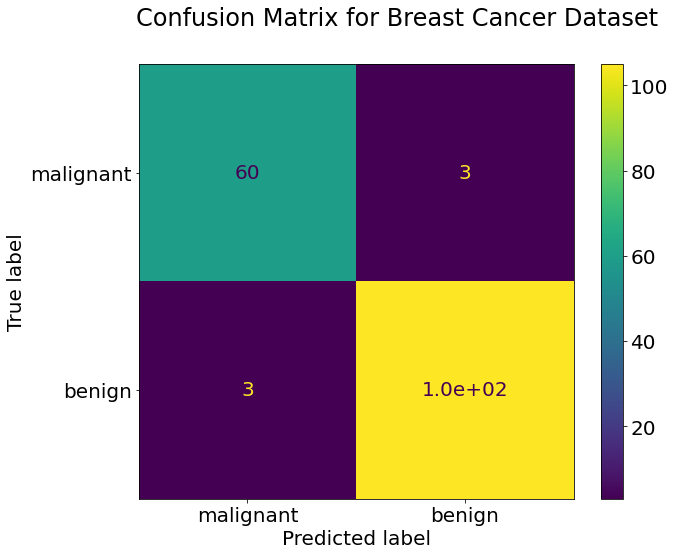

In [23]:
#Q6.
fig=plot_confusion_matrix(clf, X_test_scaled, y_test, display_labels=['malignant', 'benign'])
fig.figure_.suptitle("Confusion Matrix for Breast Cancer Dataset")
plt.show()

In [22]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 60,   3],
       [  3, 105]])

##Q7. Show the accuracy, precision, recall, and F-1 scores [5 points]

In [24]:
#A7.
print('{:<15s}{:<20s}'.format('Accuracy:',str(metrics.accuracy_score(y_test,y_pred))))
print('{:<15s}{:<20s}'.format('Precision:',str(metrics.precision_score(y_test,y_pred,average='macro'))))
print('{:<15s}{:<20s}'.format('Recall:',str(metrics.recall_score(y_test,y_pred, average='macro'))))
print('{:<15s}{:<20s}'.format('f1 score:',str(metrics.f1_score(y_test,y_pred, average='macro'))))

Accuracy:      0.9649122807017544  
Precision:     0.9623015873015872  
Recall:        0.9623015873015872  
f1 score:      0.9623015873015872  


##Q8. Plot AOC curve using sklearn [5 points]

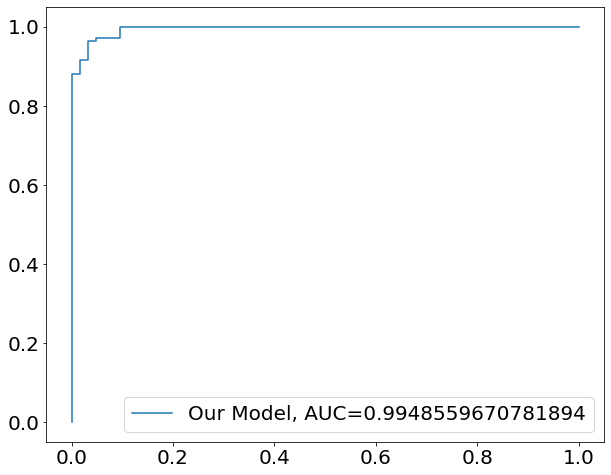

In [26]:
#A8.
y_pred_proba = clf.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Our Model, AUC="+str(auc))
plt.fontsize=30
plt.legend(loc=4)
plt.show()

##Q9. Install the Interpret ML package on Python [5 points]
https://github.com/interpretml/interpret/blob/develop/README.md

In [27]:
#A9.
!pip install interpret

     |████████████████████████████████| 5.8MB 9.9MB/s 
     |████████████████████████████████| 5.6MB 28.8MB/s 
     |████████████████████████████████| 1.8MB 46.4MB/s 
     |████████████████████████████████| 3.6MB 45.0MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 296kB 50.5MB/s 
     |████████████████████████████████| 276kB 42.8MB/s 
     |████████████████████████████████| 788kB 39.2MB/s 
     |████████████████████████████████| 122kB 48.7MB/s 
     |████████████████████████████████| 860kB 45.4MB/s 
     |████████████████████████████████| 358kB 46.0MB/s 
     |████████████████████████████████| 256kB 52.4MB/s 
     |████████████████████████████████| 1.0MB 51.2MB/s 
     |████████████████████████████████| 3.5MB 46.8MB/s 
     |████████████████████████████████| 92kB 10.0MB/s 
     |████████████████████████████████| 368kB 47.5MB/s 
     |████████████████████████████████| 358kB 29.3MB/s 
  Created wheel for dash-table: filename=dash_table-

##Q10. Plot AOC using InterpretML [5 points]

In [34]:
from interpret import show
from interpret.perf import ROC

In [29]:
#A10.
blackbox_perf = ROC(clf.predict_proba).explain_perf(X_test_scaled, y_test, name='Blackbox')
show(blackbox_perf)

/usr/local/lib/python3.7/dist-packages/interpret/provider/visualize.py:44: UserWarning: Cloud environment detected (['colab', 'ipython']): viz integration is still experimental.
  detected_envs


##Q11. Get the global sensitivity of the classifier (what are the top predictors) using Interpret ML 

[10 points]

In [50]:
from interpret.blackbox import MorrisSensitivity
feature_list = X[X.columns[:]].columns.tolist()
X_train_scaled.shape

(398, 30)

In [52]:
feature_list

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [53]:
#A11.
sensitivity = MorrisSensitivity(predict_fn=clf.predict_proba, data=X_train_scaled,feature_names=feature_list)
sensitivity_global = sensitivity.explain_global(name="Global Sensitivity")
show(sensitivity_global)

##Q12. What are the top 2 predictors in this model [5 points]

##A12. *Fractal Dimension Error & Radius Error*

#Q2. Think about interpretability and bias in Machine Learning

##Q13. Describe some problems that might arise from biases in machine learning models used on a large scale. Examples in the readings touched on ML systems used in policing and healthcare. You can engage in discussions about these or others. Do you think a machine learning model can be racist or bigoted? What can we do about that? I expect somewhere between 500-700 words. 

[30 points]

There are a plethora of problems that may arise from biases in machine learning models that have an impact on real people. Problems such as incorrectly denied parole, poor bail decisions leading to the release of dangerous criminals, or denial of a loan application are just a few of many issues that arise when blindly accepting the outputs of a machine learning algorithm without question. A machine learning model may decide that more patrol is required in poorer areas or a person of color has a higher probability of committing crime and therefore should remain behind bars. Or in other cases, a machine learning model may mistake an innocent man of committing a crime due to being wrongly classified/identified. These problems are not necessarily the fault of these machine learning models. The main issue of machine learning models is not that they are racist or bigoted, its that we are inherently bias which is mirrored in our models. As designers of these models we are fallible to creating models that fit our assumptions based on the data we have collected. For example, when researchers trained a neural network model to distinguish between wolves and huskies, the model achieved high accuracy when given images not used for training. However, the issue that arose from this was a bias in the data that they have collected where all images of wolves were in snow while all images of huskies were not. Basically, the model was classifying both images as whether they contained snow or not; anything in the snow was classified as wolves and the rest were huskies. Now this example highlights issues regarding lack of transparency, optimization of the wrong metric, and unrepresentative data. By allowing a model to work without understanding how it achieved those results can lead to problems that are only noticed when the damage is already done. The metrics we use and data that we collect impact a model’s performance significantly. So, if, for example, we were continuously feeding into our models that more crime is taking place in poorer areas, the model will make the sound decision, based on its features, that poorer areas require more patrol. Again, it is not necessarily the fault of the machine learning model, however, we have to realize and take into account these reasons for why a model makes that decision. 

In order to prevent bias from leaking into our machine learning models we must have an understanding of our models as well as have accountability or audit/regulate our machine learning models regularly. First, we must strive towards using simpler models over black box models. Black box models are problematic in that they are black boxes (i.e., we do not understand how they achieved a specific output). Simpler models should be implemented in place of black box models and especially in places where an individual can be greatly impacted. Doing so will make troubleshooting and optimizing a model easier. Lastly, and most importantly, accountability is needed when using machine learning models. Allowing third-parties, or those specialized in auditing algorithms, is essential in moving forward as this can minimize bias. Bias is minimized in this instance as those unrelated to the creation of the machine learning model will review the model with fresh eyes and determine whether there are any ethical issues.

https://unbabel.com/blog/artificial-intelligence-fails/
